# Investment Analysis Assignment

### 1.Importing Liberaries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt , seaborn as sns

### 2.  Reading Data

In [2]:
companies = pd.read_csv("./data/companies.csv",encoding = "palmos") #Using Palmos as adviced by Upgrad TA in discussion forum
rounds2 = pd.read_csv("./data/rounds2.csv",encoding = "palmos") # Used multiple encoding and then finallised with using palmos
mapping = pd.read_csv("./data/mapping.csv", encoding = "palmos")

In [3]:
companies.head(3)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN


In [4]:
companies.info() # to take the overview of the 'companies' dataframe structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
rounds2.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0


In [6]:
rounds2.info() # to take the overview of the 'rounds2' dataframe structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [7]:
mapping.head(3)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0


In [8]:
mapping.info() # to take the overview of the 'mapping' dataframe structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


#### *How many Unique values present in round2.csv

In [9]:
rounds2['company_permalink'].describe()

count                       114949
unique                       90247
top       /ORGANIZATION/SOLARFLARE
freq                            10
Name: company_permalink, dtype: object

#### ** Converting rounds2['company_permalink'] column to lower case because of inproper formating

In [10]:
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower() #Converting to lower case to handle duplicate values
                                                                        #because of lower and upper case issues

#### Using describe function to find unique values. len(rounds2['company_permalink'].unique())  can also be used 
    Using permalink column as a unique name identifier

In [11]:
print(len(rounds2['company_permalink'].unique())) ## Finding unique company name in rounds2 dataframe 
rounds2['company_permalink'].describe()           ## len(rounds2['company_permalink'].unique())  can also be used
                                                  ## Unique Companies = 66368

66368


count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

### Question : How many unique companies are present in rounds2?
    Answer : 66368


#### *How many unique companies are present in companies?

In [12]:
companies["permalink"] = companies["permalink"].str.lower() ## Lower casing the permalink column 
print(companies['permalink'].describe())                     ## Using describe() to find unique values
print(len(companies['permalink'].unique()))                 ## Unique Company names in companies dataframe = 66368 
print(len(companies['name'].unique()))                                                              

count                             66368
unique                            66368
top       /organization/oxane-materials
freq                                  1
Name: permalink, dtype: object
66368
66100


In [13]:
pd.set_option("display.max_rows", None, "display.max_columns", None) # to display whole dataframe
companies[companies.name.duplicated()].sort_values(by=['name'])     # Analysing the difference in unique values of permalink and
                                                                    # name column of companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
42570,/organization/pay-mobile-checkout,#NAME?,http://atpay.com,E-Commerce|Email Marketing|Mobile|Mobile Payme...,operating,USA,NM,Albuquerque,Albuquerque,01-05-2011
57774,/organization/themoment,#NAME?,NaN,Trading,operating,USA,CA,SF Bay Area,San Mateo,01-01-1999
5662,/organization/backup,#NAME?,http://www.backup.com/,NaN,closed,NaN,NaN,NaN,NaN,NaN
282,/organization/3divaz-3,3DIVAZ,http://www.3divaz.ch/Home,NaN,operating,CHE,1,CHE - Other,Wildegg,01-07-2014
3943,/organization/aps-llc,APS,NaN,Real Estate,operating,USA,GA,Macon,Griffin,31-03-2011
...,...,...,...,...,...,...,...,...,...,...
64572,/organization/wundercar,Wunder,http://www.wunder.org,Apps|Emerging Markets|Marketplaces|Mobile Comm...,operating,DEU,4,Hamburg,Hamburg,01-11-2013
65899,/organization/zestyapp,Zesty,http://www.zesty.com/,Health and Wellness|Logistics|Organic Food|Spe...,operating,USA,CA,SF Bay Area,San Francisco,04-11-2013
66029,/organization/zingbox-2,ZingBox,NaN,Services|Solar,operating,NaN,NaN,NaN,NaN,NaN
30620,/organization/kimble,eeGeo,NaN,Computers|Entertainment|Social Games,operating,GBR,U3,Dundee,Dundee,NaN


##### * After analysing the dataframe , the companies with same name are actually different as they are operating in different location and different category so using permalink as the correct column to find correct numbers of unique companies , so we will ignore this

#### Question: How many unique companies are present in the companies file?
    Answer: 66368

In [14]:
print('Total rows ' , companies.shape[0])                    # Find total number of rows
print(len(companies['permalink'].unique()))                  # Looking at unique value count of permalink

Total rows  66368
66368


#### Question: In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.
    Answer: Permalink

In [15]:
rounds2.loc[~rounds2['company_permalink'].isin(companies['permalink']), :] # Checking that if there is any value in rounds2 that
                                                                           # is not present in companies

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


#### Question: Are there any companies in the rounds2 file which are not  present in companies ? 
    Answer : No

### Merging companies and rounds2 dataframe to master_frame

In [16]:
master_frame = pd.merge(rounds2,companies, left_on="company_permalink", right_on="permalink", how='left')


In [17]:
master_frame.shape

(114949, 16)

#### Question: Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?
Answer : 114949


# Cleaning Master_frame as per requirement of Analysis

In [18]:
#checking null values
round(100*master_frame.isnull().sum()/len(master_frame.index),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [19]:
#Since our analysis requires Raised_amount_usd , country_code and category_list , so
#we will remove the data where these columns are null
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull())]
master_frame = master_frame[~(master_frame['country_code'].isnull())]
master_frame = master_frame[~(master_frame['category_list'].isnull())]

In [20]:
round(100*master_frame.isnull().sum()/len(master_frame.index),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         69.75
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                3.67
category_list               0.00
status                      0.00
country_code                0.00
state_code                  1.96
region                      1.34
city                        1.33
founded_at                 15.10
dtype: float64

#### **Funding_round_code , state_code ,founded_at, city , region, homepage_url are not needed so I will ignore the missing values of these columns          

In [21]:
# checking the percentage of retained rows after cleaning
print(round(100*(len(master_frame.index)/114949),2))#around 22% of the data is removed  (26420 rows)
print(master_frame.shape)

77.02
(88529, 16)


### Spark Funds wants to choose among 'seed', 'venture', 'angel' and 'private_equity' investment types for each potential investment they will make.
##### So I will remove the rows other than these 'funding_round_type' values

In [22]:
# Keeping only the rows with funding_round_type as 'venture' or 'seed' or 'angel' or 'private_equity'
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') 
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]

In [23]:
print(round(100*(len(master_frame.index)/88529),2)) # another 15% data is removed

84.86


In [24]:
master_frame.groupby(master_frame['funding_round_type'])['raised_amount_usd'].mean()

funding_round_type
angel             9.715739e+05
private_equity    7.393849e+07
seed              7.477937e+05
venture           1.172422e+07
Name: raised_amount_usd, dtype: float64

In [25]:
# adding new column by converting the values of dollar to million dollar for better understanding
master_frame['raised_amount_usd_mil'] = round(master_frame['raised_amount_usd']/1000000,4)

In [26]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,raised_amount_usd_mil
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,10.0000
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,0.7000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,2.0000
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0.0434
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0.7195


In [27]:
master_frame.groupby(master_frame['funding_round_type'])['raised_amount_usd_mil'].mean().sort_values(ascending = False)

funding_round_type
private_equity    73.938486
venture           11.724223
angel              0.971574
seed               0.747794
Name: raised_amount_usd_mil, dtype: float64

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

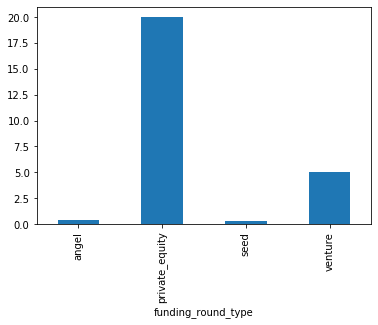

In [28]:
master_frame.groupby(master_frame['funding_round_type'])['raised_amount_usd_mil'].median().plot.bar()
master_frame['funding_round_type'].value_counts() # To find the maximum funding type people invest


Text(0.5, 1.0, 'Count')

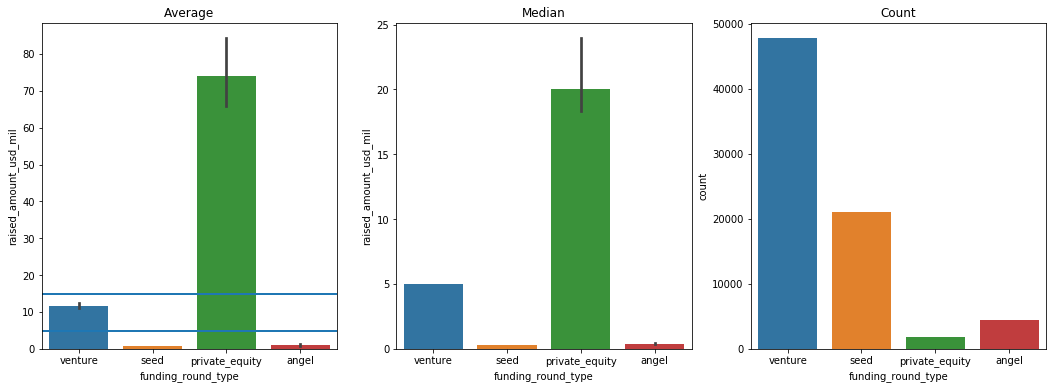

In [29]:
# increase figure size 
plt.figure(figsize=(18, 6))

# subplot 1: statistic=mean
plt.subplot(1, 3, 1)
sns.barplot(x='funding_round_type', y='raised_amount_usd_mil', data=master_frame)
plt.title("Average")
plt.axhline(y=5, linewidth=2)
plt.axhline(y=15, linewidth=2)

# subplot 2: statistic=median
plt.subplot(1, 3, 2)
sns.barplot(x='funding_round_type', y='raised_amount_usd_mil', data=master_frame, estimator=np.median)
plt.title("Median")

#subplot 3: Count of funding in each type
plt.subplot(1, 3, 3)
sns.countplot(x='funding_round_type', data=master_frame)
plt.title("Count")

In [30]:
master_frame.groupby(master_frame['funding_round_type'])['raised_amount_usd_mil'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4400.0,0.971574,7.710904,0.0,0.152725,0.4149,1.0000,494.5120
private_equity,1820.0,73.938486,201.776467,0.0,5.000000,20.0000,75.7626,4745.4602
seed,21095.0,0.747794,2.288318,0.0,0.068800,0.3000,1.0000,200.0000
venture,47809.0,11.724223,88.215714,0.0,1.600000,5.0000,12.0000,17600.0000


#### Clearly people are investing most in the venture funding type and it lies between 5  mil and 15 mil

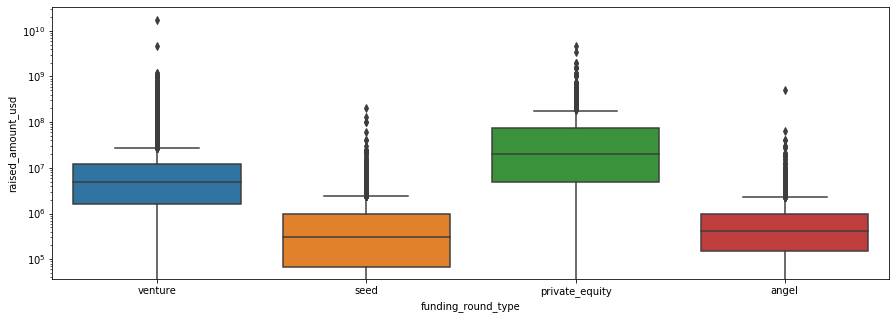

In [31]:
# boxplot of a variable across various funding categories
plt.figure(figsize=(15, 5))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

#### Average funding amount of venture type


In [32]:
round(master_frame[master_frame['funding_round_type']=='venture'].raised_amount_usd.mean(),2)

11724222.69

#### Question : Average funding amount of venture type 
Answer : 11724222.69 or 11.72 million

In [33]:
# Average funding amount of angel type
round(master_frame[master_frame['funding_round_type']=='angel'].raised_amount_usd.mean(),2)

971573.89

#### Question : Average funding amount of angel type
Answer : 971573.89 or 0.97 mil

In [34]:
#Average funding amount of seed type
round(master_frame[master_frame['funding_round_type']=='seed'].raised_amount_usd.mean(),2)

747793.68

#### Question : Average funding amount of seed type
Answer : 747793.68 or 0.75 mil

In [35]:
#Average funding amount of private equity type
round(master_frame[master_frame['funding_round_type']=='private_equity'].raised_amount_usd.mean(),2)

73938486.28

#### Question : Average funding amount of private equity type
Answer : 73938486.28 or 73.94

In [36]:
# Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round,
# which investment type is the most suitable for them?
# Using the investment count per round type and mean and median of each round type , Venture is the appropriate choice for
# investment.

#### Question : Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?
Answer : Venture

In [37]:
# Removing rows other than Venture funding type
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture'])]

In [38]:
master_frame.raised_amount_usd_mil.describe()

count    47809.000000
mean        11.724223
std         88.215714
min          0.000000
25%          1.600000
50%          5.000000
75%         12.000000
max      17600.000000
Name: raised_amount_usd_mil, dtype: float64

## Country Analysis

In [39]:
#Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type
# Removing outliers form the data for better analysis 
master_frame = master_frame[master_frame.raised_amount_usd_mil <17600]

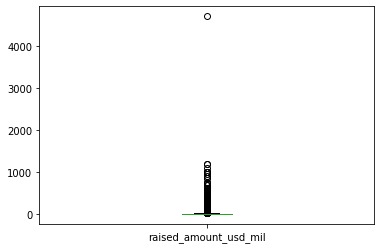

In [40]:
master_frame.raised_amount_usd_mil.plot.box()

count    47807.000000
mean        11.258254
std         29.179710
min          0.000000
25%          1.600000
50%          5.000000
75%         12.000000
max       1200.000000
Name: raised_amount_usd_mil, dtype: float64
47807


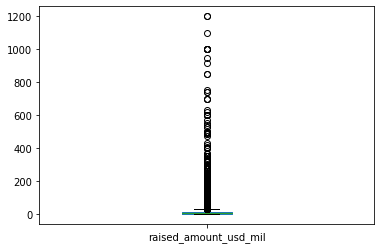

In [41]:
master_frame = master_frame[master_frame.raised_amount_usd_mil <2000]
print(master_frame.raised_amount_usd_mil.describe())
print(master_frame.shape[0]) 
master_frame.raised_amount_usd_mil.plot.box()

#### Only two data points are removed from the data set and now the data points are continous with less standard Deviation Using this as the new dataframe

country_code
USA    397768.0291
CHN     39338.9194
GBR     20072.8150
IND     14261.5089
CAN      9482.2173
FRA      7226.8510
ISR      6854.3501
DEU      6306.9211
JPN      3167.6473
Name: raised_amount_usd_mil, dtype: float64


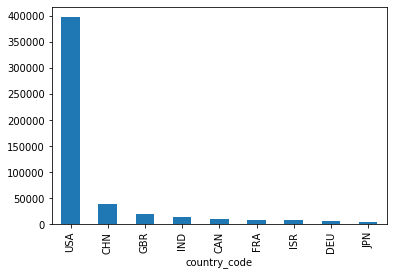

In [42]:
print(master_frame.groupby('country_code')['raised_amount_usd_mil'].sum().sort_values(ascending=False).head(9))
master_frame.groupby('country_code')['raised_amount_usd_mil'].sum().sort_values(ascending=False).head(9).plot.bar()

### From the top 9 countries USA , GBR , IND are the top 3 english speaking contries , this is decided using manual analysis
Top English Speaking Country = USA <br/>
Second English speaking country = GBR <br/>
Third English speaking country = IND

In [43]:
top9 = master_frame[master_frame['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]
top9.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,raised_amount_usd_mil
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,10.0000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,2.0000
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0.7195


## Sector Analysis 1

In [44]:
master_frame.category_list.value_counts().head(10)

Biotechnology          5402
Software               3960
Health Care            1375
Clean Technology       1268
Enterprise Software    1149
Hardware + Software    1128
Mobile                 1112
E-Commerce              896
Semiconductors          881
Health and Wellness     698
Name: category_list, dtype: int64

In [45]:
# Since some of the category_list column rows contains multiple category 
#You discuss with the CEO and come up with the business rule that the first
#string before the vertical bar will be considered the primary sector.
master_frame['primary_sector'] =master_frame['category_list'].astype(str).apply(lambda x: x.split('|')[0])
master_frame.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,raised_amount_usd_mil,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,10.0000,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,2.0000,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0.7195,Biotechnology


In [46]:
# Analysis of mapping.csv
mapping.category_list.isnull()                     # only one category value is null 
mapping=mapping[~mapping.category_list.isnull()]   # removing the null values

In [47]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      687 non-null    int64 
 2   Blanks                                   687 non-null    int64 
 3   Cleantech / Semiconductors               687 non-null    int64 
 4   Entertainment                            687 non-null    int64 
 5   Health                                   687 non-null    int64 
 6   Manufacturing                            687 non-null    int64 
 7   News, Search and Messaging               687 non-null    int64 
 8   Others                                   687 non-null    int64 
 9   Social, Finance, Analytics, Advertising  687 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 59.0+ KB


Observation : looking at the dataframe  , I do not see any more issues with it

In [48]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [49]:
m=pd.melt(mapping, id_vars=['category_list'], var_name=['main_sector'])
m=m[m.value==1]
m=m.drop('value',axis=1)
m.shape
#print(m.sort_values('category_list'))
m

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising"
6113,Social Television,"Social, Finance, Analytics, Advertising"
6114,Social Travel,"Social, Finance, Analytics, Advertising"
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [50]:
m.category_list =m.category_list.replace({'0':'na'}, regex=True)
m.category_list = m.category_list.str.lower()
master_frame['primary_sector'] = master_frame['primary_sector'].str.lower()


In [51]:
master_frame=pd.merge(master_frame,m,how="left",left_on="primary_sector",right_on="category_list")
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,raised_amount_usd_mil,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,10.0000,media,media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,2.0000,curated web,curated web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0.7195,biotechnology,biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,20.0000,analytics,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,1.7000,analytics,analytics,"Social, Finance, Analytics, Advertising"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47802,/organization/zyraz-technology,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.0,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994,7.9915,biotechnology,biotechnology,Cleantech / Semiconductors
47803,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,0.1405,e-commerce,e-commerce,Others
47804,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,8.5000,biotechnology,biotechnology,Cleantech / Semiconductors
47805,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,2.6866,biotechnology,biotechnology,Cleantech / Semiconductors


In [52]:
master_frame=master_frame.drop('category_list_y',axis=1)


In [54]:
# Creating separate Dataframe for the 3 top english venture funding type contries
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd_mil'] >= 5) & 
             (master_frame['raised_amount_usd_mil'] <= 15)]
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd_mil'] >= 5) & 
             (master_frame['raised_amount_usd_mil'] <= 15)]
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd_mil'] >= 5) & 
             (master_frame['raised_amount_usd_mil'] <= 15)]

In [55]:
print("D1 null values:" ,D1.main_sector.isnull().sum())
print("D2 null values:" ,D2.main_sector.isnull().sum())
print("D3 null values:" ,D3.main_sector.isnull().sum())

D1 null values: 1
D2 null values: 0
D3 null values: 0


In [56]:
# Since only one value is null we can either remove the row or we can fill using domain knowledge , but i do not have domain
# knowledge so I am removing the row instead
D1 = D1[~D1.main_sector.isnull()]

In [57]:
print("D1 null values:" ,D1.main_sector.isnull().sum())
print("D2 null values:" ,D2.main_sector.isnull().sum())
print("D3 null values:" ,D3.main_sector.isnull().sum())

D1 null values: 0
D2 null values: 0
D3 null values: 0


In [58]:
D1.main_sector.value_counts()

Others                                     2955
Social, Finance, Analytics, Advertising    2717
Cleantech / Semiconductors                 2354
News, Search and Messaging                 1587
Health                                      913
Manufacturing                               803
Entertainment                               591
Automotive & Sports                         167
Name: main_sector, dtype: int64

In [59]:
# Trying to create a count and sum using pivot table
D1.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,167,1.454104e+09
Cleantech / Semiconductors,2354,2.167343e+10
Entertainment,591,5.099198e+09
Health,913,8.251859e+09
Manufacturing,803,7.298553e+09
"News, Search and Messaging",1587,1.399157e+10
Others,2955,2.635601e+10
"Social, Finance, Analytics, Advertising",2717,2.383238e+10


In [60]:
#Adding total number of investment and total amount invested column to D1 dataframe
D1p=D1.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})
D1 = D1.merge(D1p, how='left', on ='main_sector')
D1.rename(columns = {'count':'total_number'}, inplace = True)
D1.rename(columns = {'sum':'total_amount_invested'}, inplace = True)

In [61]:
#Adding total number of investment and total amount invested column to D2 dataframe
D2p=D2.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})
D2 = D2.merge(D1p, how='left', on ='main_sector')
D2.rename(columns = {'count':'total_number'}, inplace = True)
D2.rename(columns = {'sum':'total_amount_invested'}, inplace = True)

In [62]:
#Adding total number of investment and total amount invested column to D3 dataframe
D3p=D3.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})
D3 = D3.merge(D1p, how='left', on ='main_sector')
D3.rename(columns = {'count':'total_number'}, inplace = True)
D3.rename(columns = {'sum':'total_amount_invested'}, inplace = True)

In [63]:
D1.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,raised_amount_usd_mil,primary_sector,main_sector,total_number,total_amount_invested
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,8.9000,analytics,"Social, Finance, Analytics, Advertising",2717,2.383238e+10
1,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,5.0000,apps,"News, Search and Messaging",1587,1.399157e+10
2,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,11.9993,service providers,Others,2955,2.635601e+10


In [64]:
D2.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,raised_amount_usd_mil,primary_sector,main_sector,total_number,total_amount_invested
0,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.0,/organization/365scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,5.5000,android,"Social, Finance, Analytics, Advertising",2717,2.383238e+10
1,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.0,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,8.4683,content creators,Entertainment,591,5.099198e+09
2,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.0,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,10.0000,content creators,Entertainment,591,5.099198e+09


In [65]:
D3.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,raised_amount_usd_mil,primary_sector,main_sector,total_number,total_amount_invested
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,10.0000,media,Entertainment,591,5.099198e+09
1,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,6.3695,e-commerce,Others,2955,2.635601e+10
2,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.0,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,6.4100,finance,"Social, Finance, Analytics, Advertising",2717,2.383238e+10


In [66]:
D1.raised_amount_usd.count()

12087

In [67]:
D2.raised_amount_usd.count()

622

In [68]:
D3.raised_amount_usd.count()

328

### Question:  Total number of investments (count)
Answer :<br/> D1: 12087 <br/> D2: 622 <br/> D3: 328

In [69]:
D1.raised_amount_usd.sum()

107957097269.0

In [70]:
D2.raised_amount_usd.sum()

5394078692.0

In [71]:
D3.raised_amount_usd.sum()

2949543602.0

### Question: Total amount of investment (USD)
Answer: <br/>
D1: 1079570269.0 <br/>
D2: 5394078692.0 <br/>
D3: 2949543602.0 <br/>

In [72]:
D1.groupby(D1.main_sector).raised_amount_usd.count().sort_values(ascending = False)

main_sector
Others                                     2955
Social, Finance, Analytics, Advertising    2717
Cleantech / Semiconductors                 2354
News, Search and Messaging                 1587
Health                                      913
Manufacturing                               803
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [73]:
D2.groupby(D2.main_sector).raised_amount_usd.count().sort_values(ascending = False)

main_sector
Others                                     148
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [74]:
D3.groupby(D3.main_sector).raised_amount_usd.count().sort_values(ascending = False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

### Question: Top sector (based on count of investments)
Answer: <br/> D1 : Others <br/> D2 : Others <br/> D3 : Others

### Question: Second-best sector (based on count of investments)
Answer: <br/> D1 : Social, Finance, Analytics, Advertising <br/> D2 : Social, Finance, Analytics, Advertising <br/> D3 : Social, Finance, Analytics, Advertising

### Question: Third-best sector (based on count of investments)
Answer: <br/> D1 : Cleantech / Semiconductors <br/> D2 : Cleantech / Semiconductors <br/> D3 : News, Search and Messaging

### Question: Number of investments in the top sector
Answer: <br/> D1 : 2955 <br/> D2 : 148 <br/> D3 : 110

### Question: Number of investments in the second-best sector
Answer: <br/> D1 : 2717 <br/> D2 : 133 <br/> D3 : 60

### Question: Number of investments in the third-best sector
Answer: <br/> D1 : 2354 <br/> D2 : 130 <br/> D3 : 52

In [75]:
# For the top sector count-wise (point 3), which company received the highest investment?
D1[D1['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(1)

main_sector  permalink                
Others       /organization/virtustream    64300000.0
Name: raised_amount_usd, dtype: float64

In [76]:
D2[D2['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(1)

main_sector  permalink                   
Others       /organization/electric-cloud    37000000.0
Name: raised_amount_usd, dtype: float64

In [77]:
D3[D3['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(1)

main_sector  permalink                 
Others       /organization/firstcry-com    39000000.0
Name: raised_amount_usd, dtype: float64

### Question: For the top sector count-wise (point 3), which company received the highest investment?
Answer: <br/> D1: /organization/virtustream  <br/> D2: /organization/electric-cloud <br/> D3: /organization/firstcry-com 

In [78]:
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(1)

main_sector                              permalink                
Social, Finance, Analytics, Advertising  /organization/shotspotter    67933006.0
Name: raised_amount_usd, dtype: float64

In [79]:
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(1)

main_sector                              permalink                          
Social, Finance, Analytics, Advertising  /organization/celltick-technologies    37500000.0
Name: raised_amount_usd, dtype: float64

In [80]:
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(1)

main_sector                              permalink                    
Social, Finance, Analytics, Advertising  /organization/manthan-systems    50700000.0
Name: raised_amount_usd, dtype: float64

### Question: For the second-best sector count-wise (point 4), which company received the highest investment?
Answer: <br/> D1: /organization/shotspotter  <br/> D2: /organization/celltick-technologies <br/> D3: /organization/manthan-systems 

## Checkpoint 6


In [81]:
#Making a new data frame to display the plot required in Checkpoint 6
master_frame1 = pd.merge(rounds2,companies, left_on="company_permalink", right_on="permalink", how='left')
master_frame1 = master_frame1[~(master_frame1['raised_amount_usd'].isnull())]
master_frame1 = master_frame1[~(master_frame1['country_code'].isnull())]
master_frame1 = master_frame1[~(master_frame1['category_list'].isnull())]


In [82]:

master_frame1 = master_frame1[(master_frame1['funding_round_type'] == 'venture') 
                            | (master_frame1['funding_round_type'] == 'seed')
                            | (master_frame1['funding_round_type'] == 'angel')
                            | (master_frame1['funding_round_type'] == 'private_equity')]


Text(0.5, 1.0, 'Count')

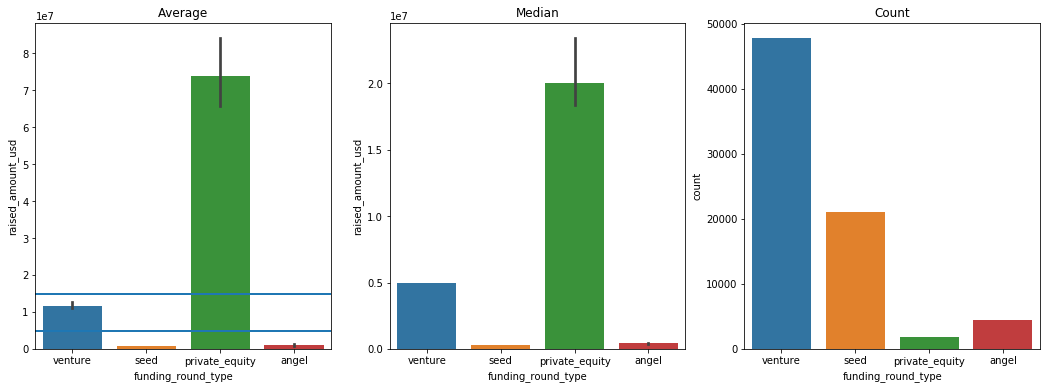

In [83]:
# increase figure size 
plt.figure(figsize=(18, 6))

# subplot 1: statistic=mean
plt.subplot(1, 3, 1)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame1)
plt.title("Average")
plt.axhline(y=5000000, linewidth=2)
plt.axhline(y=15000000, linewidth=2)

# subplot 2: statistic=median
plt.subplot(1, 3, 2)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame1, estimator=np.median)
plt.title("Median")

#subplot 3: Count of funding in each type
plt.subplot(1, 3, 3)
sns.countplot(x='funding_round_type', data=master_frame1)
plt.title("Count")

A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

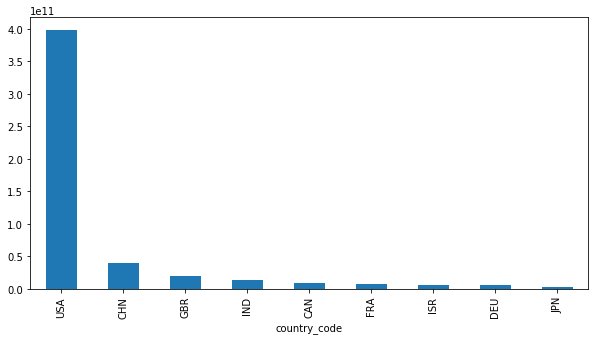

In [84]:
plt.figure(figsize=(10,5))
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9).plot.bar()


A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

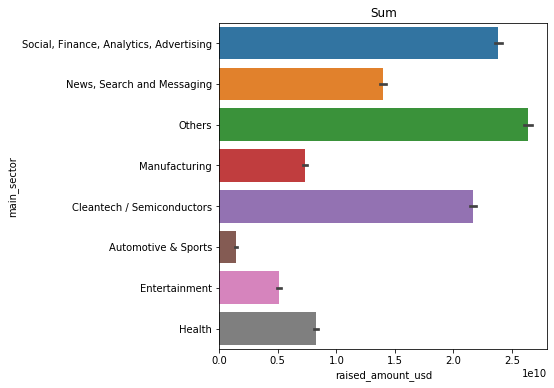

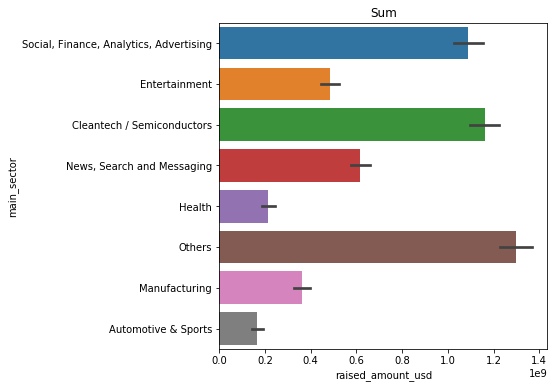

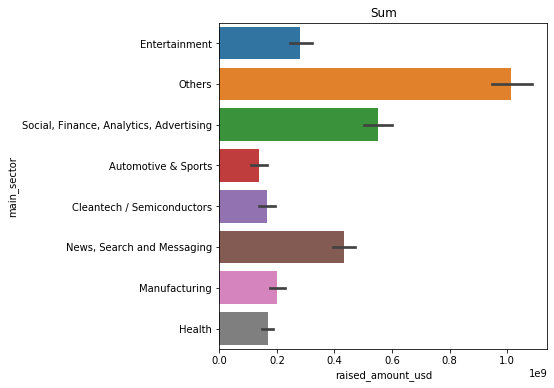

In [85]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D1, estimator=sum)
plt.title("Sum")
plt.show()
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D2, estimator=sum)
plt.title("Sum")
plt.show()
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 3)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D3, estimator=sum)
plt.title("Sum")
plt.show()

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (Venture).